# Lleva a cabo el Reconocimiento de Letras usando primero el nuevo Modelo YOLO entrenado con ImageAI (*detector*), y luego el Modelo ConvNet CNN-Letras entrenado anteriomente (*classifier*)


0) Preparar ambiente e instalar paquetes:

In [1]:
# instala versión anterior de TF para compatibilidad con ImageAI
# notar que la sesión debe estar configurada como GPU
# seleccione <RESTART RUNTIME> al finalizar si lo solicita
#pip install tensorflow-gpu==1.13.1
!pip3 install tensorflow-gpu==1.13.1

     |████████████████████████████████| 345.2MB 48kB/s 
     |████████████████████████████████| 3.2MB 47.4MB/s 
     |████████████████████████████████| 368kB 58.7MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 1.13.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 1.13.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [2]:
# instala paquete de ImageAI
#pip install imageAI
!pip3 install imageai --upgrade

     |████████████████████████████████| 184kB 4.9MB/s 



1) Cargar librerías:

In [3]:
from IPython.display import Image, display
from PIL import Image as ImPIL
import numpy as np
import os
import os.path

from imageai.Detection.Custom import CustomObjectDetection

import json
from keras.models import model_from_json
from keras.models import load_model

print ("Librerías cargadas.")

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

Librerías cargadas.


2) Montar el Drive:

In [4]:
# monta Google Drive:
# Nota: la primera vez se debe confirmar el uso logueandose en "Google Drive File Stream" y obteniendo código de autentificación.
from google.colab import drive
drive.mount('/content/gdrive')

# directorio local en Google Drive
path = '/content/gdrive/My Drive/IA/demoObjDet-Carteles'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


3) Preparar los modelos para hacer el reconocimiento:

In [5]:
# carga el modelo YOLO entrenado
detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath( path + '/Carteles/models//modeloImageAIEntrenado.h5' ) # define el modelo entrenado a usar
detector.setJsonPath( path + '/Carteles/json/detection_config.json' ) # define el archivo configuración a usar 
detector.loadModel()

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# define los nombres de los archivos a utilizar para leer/grabar el modelo
pathCNN = '/content/gdrive/My Drive/IA/demoConvNet-Letras'
history_file_name = pathCNN + '/Model/CNN_L_history_dump_final.json'
weights_file_name = pathCNN + '/Model/CNN_L_model_final.h5'
model_json_file_name = pathCNN + '/Model/CNN_L_model_final.json'
model_req_image_size = (128, 128)

# carga modelo ya grabado de ConvNet
if os.path.isfile(model_json_file_name):
    classifier = load_model(weights_file_name)

    if os.path.isfile(history_file_name):
      h = json.load(open(history_file_name, 'r'))
      print("Modelo cargado: [", weights_file_name, "], [", history_file_name, "] y [", model_json_file_name, "] ")
    else: 
      print("No se encuentra modelo para cargar")
else:   
    print("No se encuentra modelo para cargar")


# carga la lista de clases si no está definida   
import csv
with open( pathCNN + '/Model/clasesLetrasNros.csv', mode='r') as csvfile:
    all_classes = list(csv.reader(csvfile))[0]
print('Definición de las clases: ', all_classes)
##['4', '5', '2', '7', '9', '6', '8', '3', '1', 'B', 'A', '0', 'E', 'F', 'D', 'C', 'G', 'K', 'I', 'J', 'H', 'M', 'N', 'L', 'O', 'Q', 'P', 'R', 'V', 'U', 'Z', 'W', 'X', 'S', 'Y', 'T']


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Modelo cargado: [ /content/gdrive/My Drive/IA/demoConvNet-Letras/Model/CNN_L_model_final.h5 ], [ /content/gdrive/My Drive/IA/demoConvNet-Letras/Model/CNN_L_history_dump_final.json ] y [ /content/gdrive/My Drive/IA/demoConvNet-Letras/Model/CNN_L_model_final.json ] 
Definición de las clases:  ['4', '5', '2', '7', '9', '6', '8', '3', '1', 'B', 'A', '0', 'E', 'F', 'D', 'C', 'G', 'K', 'I', 'J', 'H', 'M', 'N', 'L', 'O', 'Q', 'P', 'R', 'V', 'U', 'Z', 'W', 'X', 'S', 'Y', 'T']


4) Llevar a cabo el reconocimiento sobre imágenes de prueba:

In [7]:
# define imágenes a procesar
# configura las carpetas
dirTest = path + '/Carteles/validation/images' 

# levanta las imágenes de prueba
process_FileNames = [ fn for fn in os.listdir( dirTest ) if fn.endswith('.png') ]
print("> Imágenes a probar: ", len(process_FileNames))


> Imágenes a probar:  80



>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_14_LUTY.png : 


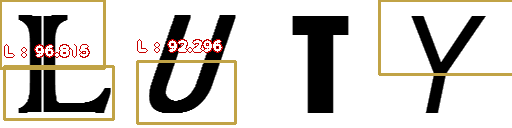

    objetos detectados:  4

  --> palabra detectada y reconocida con error:  ILUY !  {real:  LUTY }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_19_GRB9.png : 


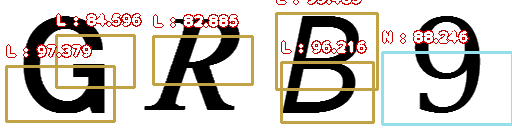

    objetos detectados:  6

  --> palabra detectada y reconocida con error:  IGRB9 !  {real:  GRB9 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_22_QTLY2.png : 


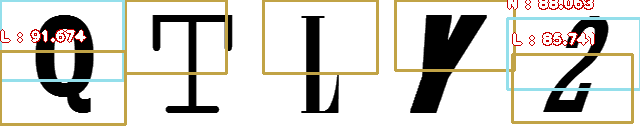

    objetos detectados:  7

  --> palabra detectada y reconocida con error:  QILT2 !  {real:  QTLY2 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_23_15EM.png : 


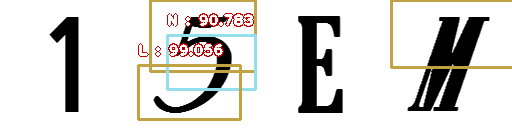

    objetos detectados:  4

  --> palabra detectada y reconocida con error:  TJM !  {real:  15EM }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_24_PEK.png : 


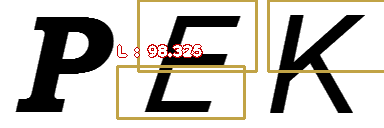

    objetos detectados:  3

  --> palabra detectada y reconocida con error:  EK !  {real:  PEK }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_25_C1188.png : 


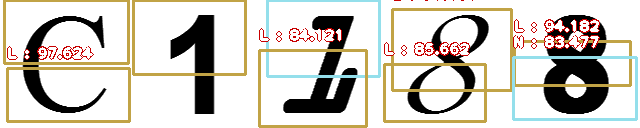

    objetos detectados:  9

  --> palabra detectada y reconocida con error:  C1L18 !  {real:  C1188 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_26_W5LR8.png : 


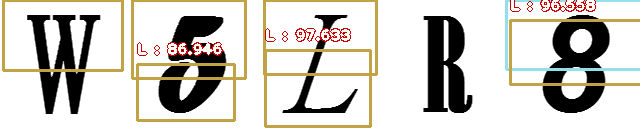

    objetos detectados:  7

  --> palabra detectada y reconocida con error:  W6L8 !  {real:  W5LR8 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_27_2006.png : 


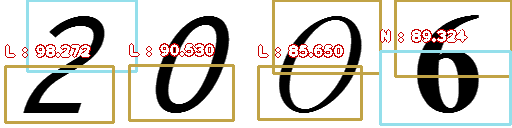

    objetos detectados:  7

  --> palabra detectada y reconocida con error:  2ROCO6 !  {real:  2006 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_30_232V.png : 


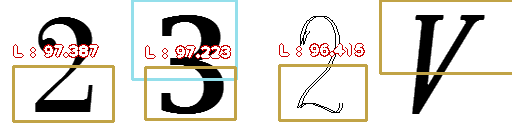

    objetos detectados:  5

  --> palabra detectada y reconocida correctamente:  232V

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_31_W1L1.png : 


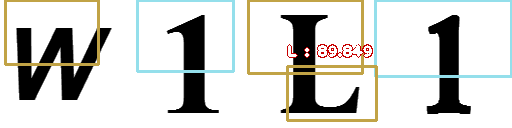

    objetos detectados:  5

  --> palabra detectada y reconocida con error:  W1LI1 !  {real:  W1L1 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_35_HY9.png : 


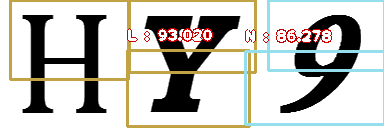

    objetos detectados:  5

  --> palabra detectada y reconocida correctamente:  HY9

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_37_2YR.png : 


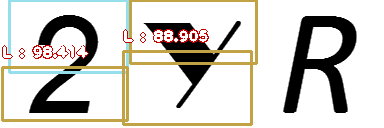

    objetos detectados:  4

  --> palabra detectada y reconocida con error:  2Y !  {real:  2YR }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_39_IKDKQ.png : 


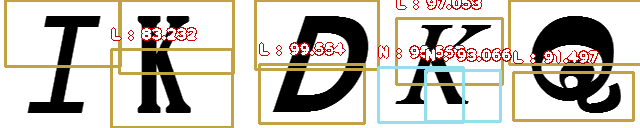

    objetos detectados:  10

  --> palabra detectada y reconocida con error:  IKLDITKQ !  {real:  IKDKQ }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_41_HJQO.png : 


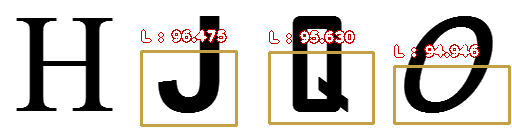

    objetos detectados:  3

  --> palabra detectada y reconocida con error:  JDO !  {real:  HJQO }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_50_B77QE.png : 


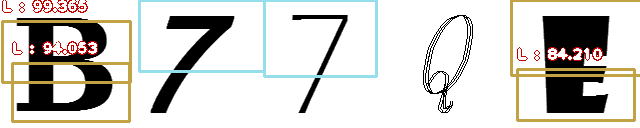

    objetos detectados:  6

  --> palabra detectada y reconocida con error:  BT7IE !  {real:  B77QE }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_58_18T.png : 


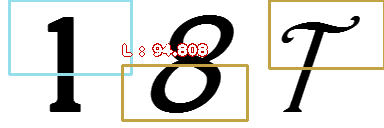

    objetos detectados:  3

  --> palabra detectada y reconocida correctamente:  18T

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_64_1OAJ4.png : 


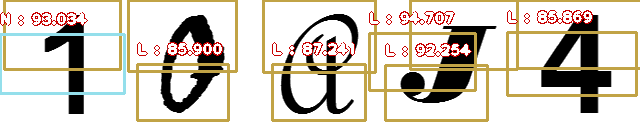

    objetos detectados:  11

  --> palabra detectada y reconocida con error:  10QJI4 !  {real:  1OAJ4 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_67_SSH4L.png : 


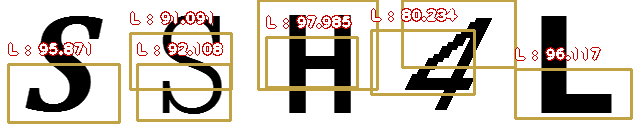

    objetos detectados:  8

  --> palabra detectada y reconocida con error:  SHJ4L !  {real:  SSH4L }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_71_C3W7.png : 


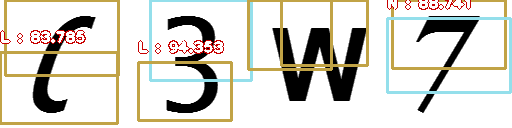

    objetos detectados:  8

  --> palabra detectada y reconocida con error:  C3SW7 !  {real:  C3W7 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_81_9KSWC.png : 


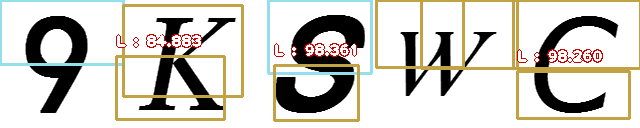

    objetos detectados:  9

  --> palabra detectada y reconocida con error:  9IKSMVC !  {real:  9KSWC }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_82_AFEC.png : 


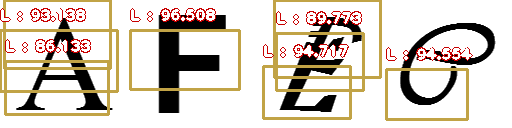

    objetos detectados:  8

  --> palabra detectada y reconocida con error:  AFBE6 !  {real:  AFEC }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_86_79O.png : 


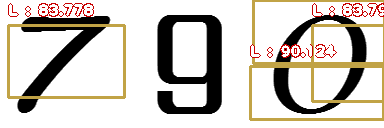

    objetos detectados:  4

  --> palabra detectada y reconocida con error:  7IO !  {real:  79O }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_91_D39.png : 


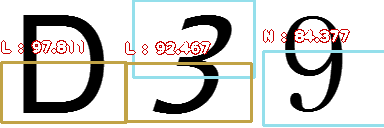

    objetos detectados:  4

  --> palabra detectada y reconocida correctamente:  D39

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_92_UZU.png : 


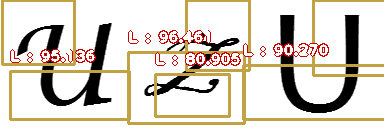

    objetos detectados:  7

  --> palabra detectada y reconocida con error:  TU7K2JU !  {real:  UZU }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_98_9GCH.png : 


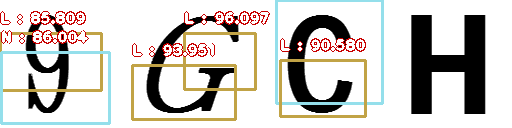

    objetos detectados:  6

  --> palabra detectada y reconocida con error:  9RGC !  {real:  9GCH }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_108_WEKS.png : 


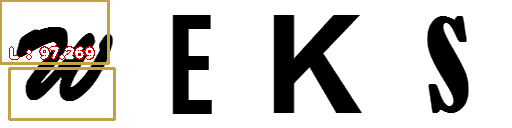

    objetos detectados:  2

  --> palabra detectada y reconocida con error:  8W !  {real:  WEKS }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_109_UNH6.png : 


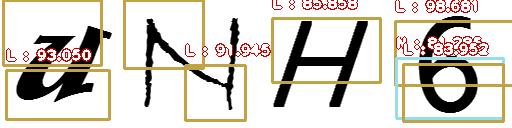

    objetos detectados:  8

  --> palabra detectada y reconocida con error:  BU4AH6 !  {real:  UNH6 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_119_TQ44Y.png : 


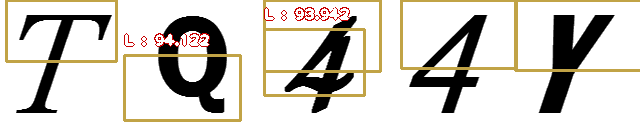

    objetos detectados:  6

  --> palabra detectada y reconocida con error:  TQJ4Y !  {real:  TQ44Y }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_129_7A2OX.png : 


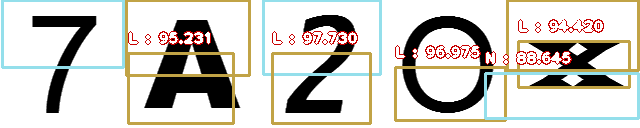

    objetos detectados:  9

  --> palabra detectada y reconocida correctamente:  7A2OX

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_131_PXVW.png : 


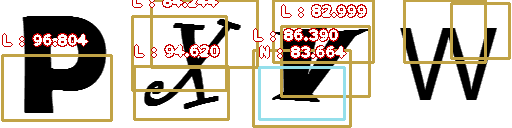

    objetos detectados:  10

  --> palabra detectada y reconocida con error:  PJIWYTYDV !  {real:  PXVW }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_133_NML.png : 


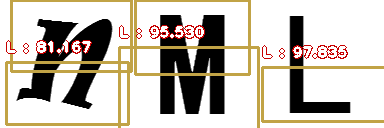

    objetos detectados:  5

  --> palabra detectada y reconocida con error:  KML !  {real:  NML }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_134_B6L4D.png : 


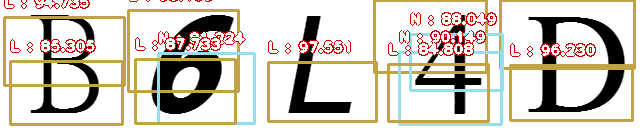

    objetos detectados:  12

  --> palabra detectada y reconocida con error:  B6JL4A4D !  {real:  B6L4D }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_135_1IW.png : 


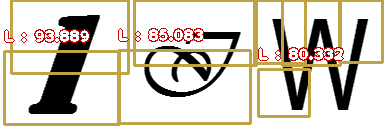

    objetos detectados:  8

  --> palabra detectada y reconocida con error:  1IJWNI !  {real:  1IW }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_137_NXNK.png : 


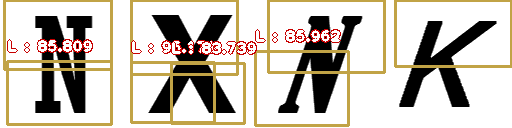

    objetos detectados:  8

  --> palabra detectada y reconocida con error:  IKXAMK !  {real:  NXNK }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_140_79I.png : 


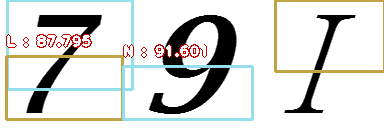

    objetos detectados:  4

  --> palabra detectada y reconocida correctamente:  79I

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_143_XGM8.png : 


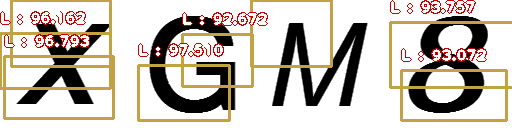

    objetos detectados:  8

  --> palabra detectada y reconocida con error:  XGI8 !  {real:  XGM8 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_151_4GI15.png : 


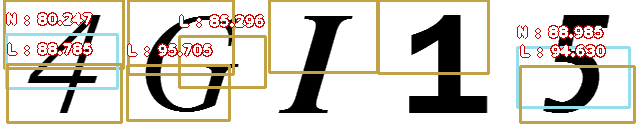

    objetos detectados:  10

  --> palabra detectada y reconocida con error:  4GFI25 !  {real:  4GI15 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_153_OLA1F.png : 


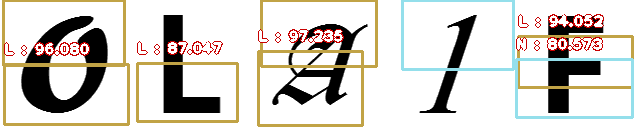

    objetos detectados:  8

  --> palabra detectada y reconocida con error:  CLRJ1F !  {real:  OLA1F }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_161_1RU5F.png : 


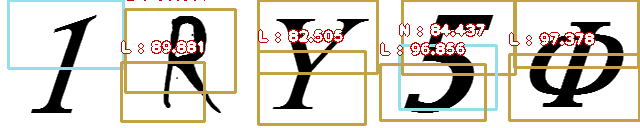

    objetos detectados:  10

  --> palabra detectada y reconocida con error:  1WRYE5JQ !  {real:  1RU5F }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_164_3ZQ2E.png : 


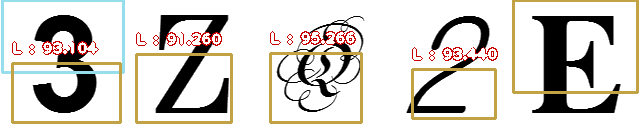

    objetos detectados:  6

  --> palabra detectada y reconocida con error:  3ZO2E !  {real:  3ZQ2E }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_170_X03W6.png : 


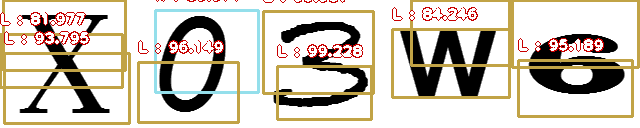

    objetos detectados:  11

  --> palabra detectada y reconocida con error:  XOQ3NW6 !  {real:  X03W6 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_176_RLC.png : 


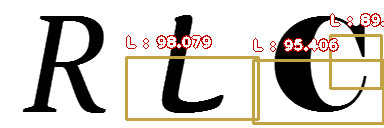

    objetos detectados:  3

  --> palabra detectada y reconocida con error:  LIC !  {real:  RLC }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_177_3O17.png : 


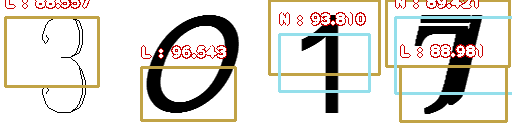

    objetos detectados:  7

  --> palabra detectada y reconocida con error:  3C1T7T !  {real:  3O17 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_178_OB29.png : 


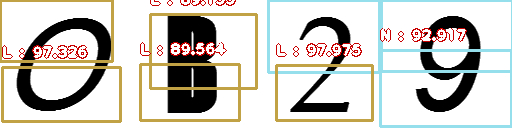

    objetos detectados:  8

  --> palabra detectada y reconocida con error:  COBR29 !  {real:  OB29 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_194_MO9Z.png : 


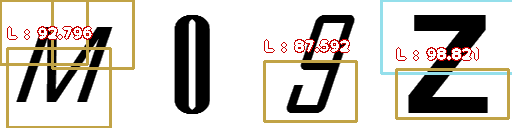

    objetos detectados:  6

  --> palabra detectada y reconocida con error:  DMIEZ !  {real:  MO9Z }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_196_G8R5.png : 


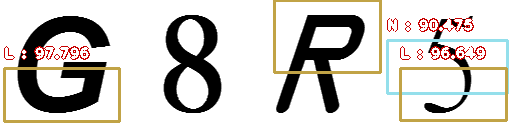

    objetos detectados:  4

  --> palabra detectada y reconocida con error:  GR5 !  {real:  G8R5 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_199_VMV8M.png : 


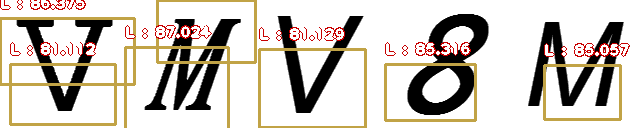

    objetos detectados:  7

  --> palabra detectada y reconocida con error:  VDIVUM !  {real:  VMV8M }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_202_CTWO.png : 


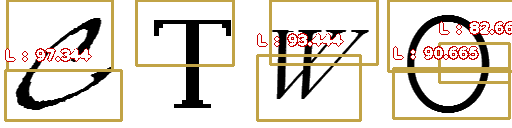

    objetos detectados:  8

  --> palabra detectada y reconocida con error:  CTWIO !  {real:  CTWO }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_212_QFY.png : 


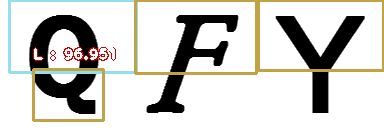

    objetos detectados:  4

  --> palabra detectada y reconocida correctamente:  QFY

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_214_N8U9.png : 


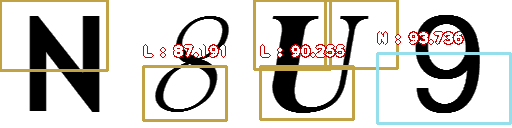

    objetos detectados:  6

  --> palabra detectada y reconocida con error:  W8IUJ9 !  {real:  N8U9 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_215_GMBZO.png : 


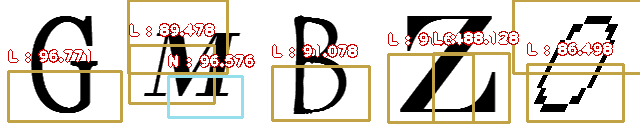

    objetos detectados:  9

  --> palabra detectada y reconocida con error:  GDWNBJID !  {real:  GMBZO }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_216_I8UN.png : 


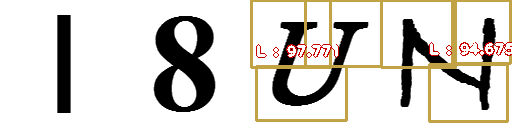

    objetos detectados:  6

  --> palabra detectada y reconocida con error:  JT4Q !  {real:  I8UN }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_220_2IJV.png : 


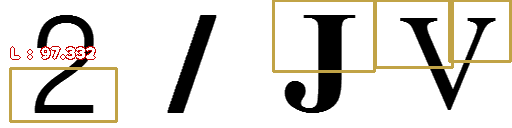

    objetos detectados:  4

  --> palabra detectada y reconocida con error:  2JUT !  {real:  2IJV }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_230_KTL.png : 


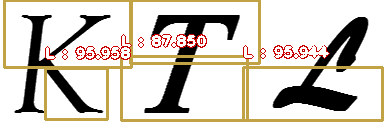

    objetos detectados:  5

  --> palabra detectada y reconocida con error:  CKTL !  {real:  KTL }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_245_SBSV.png : 


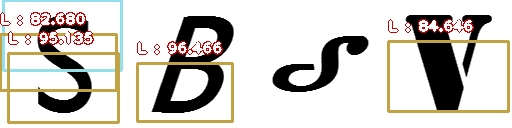

    objetos detectados:  5

  --> palabra detectada y reconocida con error:  SBV !  {real:  SBSV }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_255_2RGI.png : 


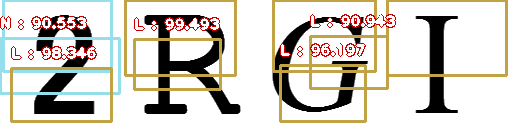

    objetos detectados:  9

  --> palabra detectada y reconocida con error:  2RGIGI !  {real:  2RGI }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_257_GZ8F.png : 


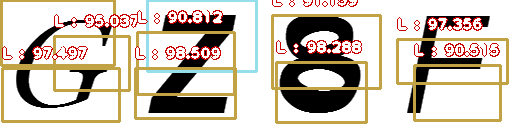

    objetos detectados:  10

  --> palabra detectada y reconocida con error:  RGZL8F !  {real:  GZ8F }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_261_S5O4.png : 


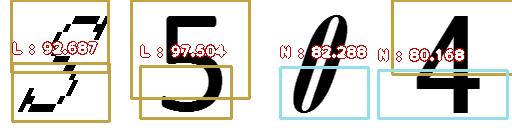

    objetos detectados:  7

  --> palabra detectada y reconocida con error:  E504 !  {real:  S5O4 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_262_3VPUU.png : 


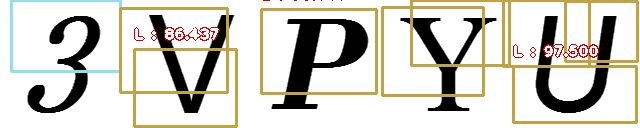

    objetos detectados:  9

  --> palabra detectada y reconocida con error:  3VPIYJU !  {real:  3VPUU }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_281_B93B.png : 


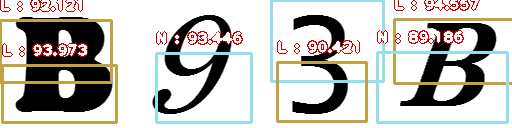

    objetos detectados:  7

  --> palabra detectada y reconocida correctamente:  B93B

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_283_5LZCK.png : 


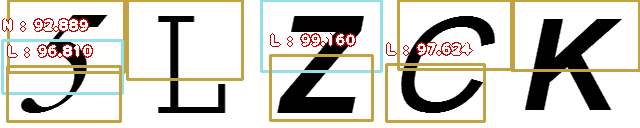

    objetos detectados:  9

  --> palabra detectada y reconocida correctamente:  5LZCK

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_289_AHL.png : 


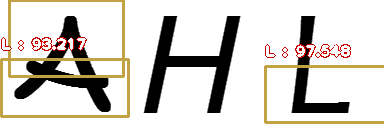

    objetos detectados:  3

  --> palabra detectada y reconocida con error:  AL !  {real:  AHL }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_300_P91.png : 


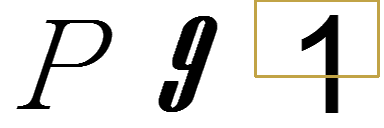

    objetos detectados:  1

  --> palabra detectada y reconocida con error:  1 !  {real:  P91 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_307_X63PC.png : 


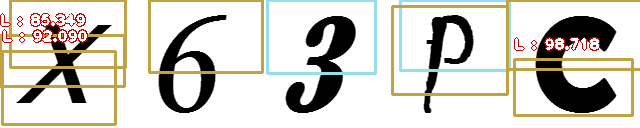

    objetos detectados:  9

  --> palabra detectada y reconocida con error:  XC3PC !  {real:  X63PC }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_311_W2YF.png : 


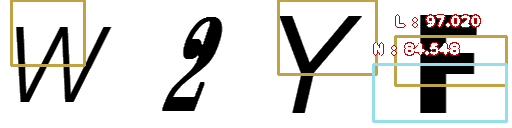

    objetos detectados:  4

  --> palabra detectada y reconocida con error:  NYF !  {real:  W2YF }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_313_B4OP.png : 


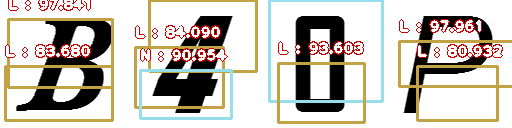

    objetos detectados:  9

  --> palabra detectada y reconocida con error:  B4DFP !  {real:  B4OP }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_315_MH0.png : 


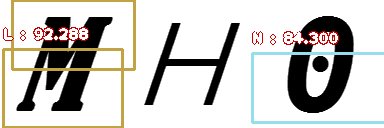

    objetos detectados:  3

  --> palabra detectada y reconocida con error:  MK0 !  {real:  MH0 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_318_GK5TO.png : 


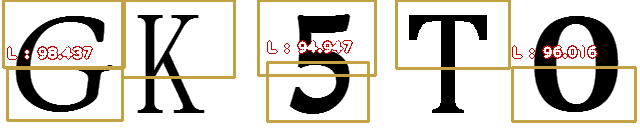

    objetos detectados:  7

  --> palabra detectada y reconocida con error:  GK5T0 !  {real:  GK5TO }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_320_ATNB.png : 


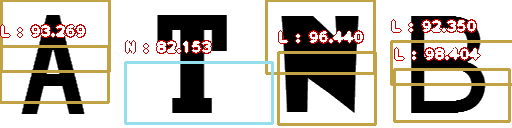

    objetos detectados:  7

  --> palabra detectada y reconocida correctamente:  ATNB

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_329_QAWJ.png : 


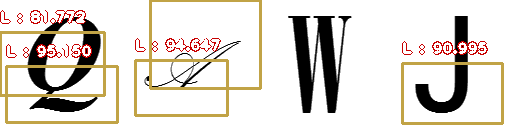

    objetos detectados:  5

  --> palabra detectada y reconocida con error:  Q9XJ !  {real:  QAWJ }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_332_XGE6.png : 


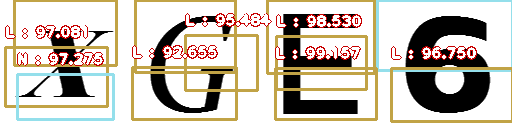

    objetos detectados:  11

  --> palabra detectada y reconocida con error:  IXIGE6 !  {real:  XGE6 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_340_LB29.png : 


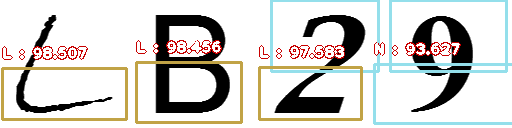

    objetos detectados:  6

  --> palabra detectada y reconocida correctamente:  LB29

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_342_3S1.png : 


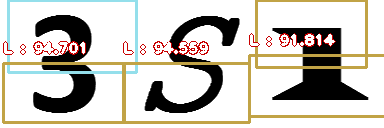

    objetos detectados:  5

  --> palabra detectada y reconocida con error:  3SI !  {real:  3S1 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_352_RKO0.png : 


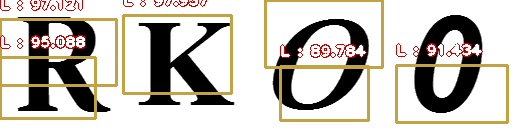

    objetos detectados:  6

  --> palabra detectada y reconocida con error:  RKDO0 !  {real:  RKO0 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_353_416.png : 


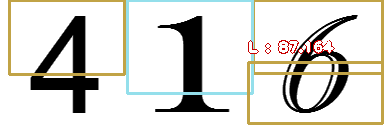

    objetos detectados:  4

  --> palabra detectada y reconocida correctamente:  416

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_357_XMK.png : 


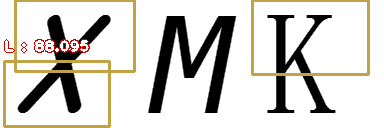

    objetos detectados:  3

  --> palabra detectada y reconocida con error:  XKK !  {real:  XMK }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_361_TQGD.png : 


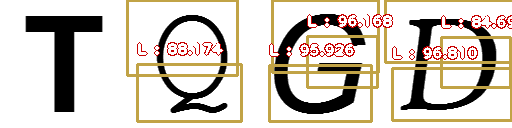

    objetos detectados:  8

  --> palabra detectada y reconocida con error:  QGID !  {real:  TQGD }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_368_UQM.png : 


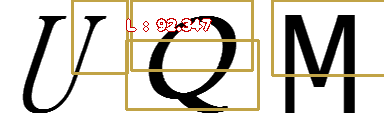

    objetos detectados:  4

  --> palabra detectada y reconocida con error:  TQN !  {real:  UQM }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_369_TUJX9.png : 


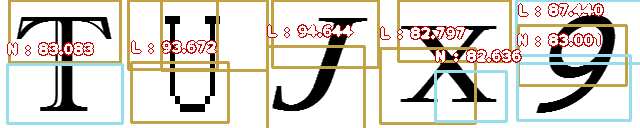

    objetos detectados:  13

  --> palabra detectada y reconocida con error:  TIJIKX9 !  {real:  TUJX9 }

>  /content/gdrive/My Drive/IA/demoObjDet-Carteles/Carteles/validation/images/cartel_392_RTX.png : 


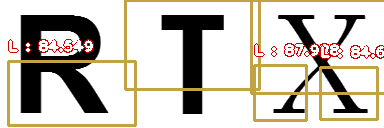

    objetos detectados:  5

  --> palabra detectada y reconocida con error:  RLTCX !  {real:  RTX }

 ********************************************************************************** 
   * Cantidad reconocidas correctamente:  12  imágenes. 
   * Cantidad reconocidas con error:  68  imágenes. 
   * Efectividad:  15.0  % 
 ********************************************************************************** 



In [8]:
# define minima probabilidad a usar
minProbObjDet = 80 

# define si muestra detalle o no
muestraDetalle = False

# contadores auxiliares
cantImagReconOK = 0
cantImagReconERROR = 0

# procesa las imágenes 
for fn in process_FileNames:

  # define archivo a procesar y generar
  imagenProcesar = dirTest + '/' + fn

  print("\n> ", imagenProcesar, ": ")
  
  # procesa la imagen con detector
  returned_img, detections_info, detections_img = detector.detectObjectsFromImage(
                                            input_image = imagenProcesar, # imagen a procesar
                                            minimum_percentage_probability = minProbObjDet, # mínima probabilidad para considerar objetos detectados 
                                            display_percentage_probability = minProbObjDet, # mínima probabilidad para mostrar objetos en nueva imagen
                                            display_object_name = True, # indica que se muestra los nombres de las clases en nueva imagen
                                            extract_detected_objects = True, # indica que no se genera nuevas sub-imágenes con los objetos detectados
                                            output_type = "array") # indica que devuelve también un array con sub-imágenes con los objetos detectados

  # muestra la imagen con los objetos detectados
  display( ImPIL.fromarray(returned_img, 'RGB') )
  print("    objetos detectados: ", len(detections_info))

  # vector auxiliar para mostrar palabra 
  letrasDetectRecon = []

  # procesa los objetos detectados
  for detection, detObj in zip(detections_info, detections_img):

    # ******************************************************************************************
    # * Dado que no se logra entrenar satisfactoriamente el modelo detector
    # el mismo genera subimagenes parciales de letras y nros,
    # por lo tanto no se usa las imágenes que devuelve 
    # sino que se toma subimagenes más grandes 
    # (se amplica lo detectado a toda la altura y con el ancho definido por detector)
    # De todas formas, para algunas letras genera varias regiones superpuestas.
    nuevoRangoIm = (detection["box_points"][0], 0, detection["box_points"][2], 128) # (ini ancho, ini alto, fin ancho, fin alto)
    centroideIm = (nuevoRangoIm[2]-nuevoRangoIm[0]/2) 
    imDetObj = ImPIL.open(imagenProcesar).crop(nuevoRangoIm)
    # * En lugar estode lo anterior,  se usaría lo siguiente, si el modelo detector funcionara bien 
    # levanta la sub_imagen del objeto detectado
    #imDetObj = ImPIL.fromarray(detObj, 'RGB')
    # ********************************************************************************************

    # ajusta el tamaño de la imagen para que sea de 128x128
    imDetObj = imDetObj.resize(model_req_image_size, ImPIL.ANTIALIAS)

    # procesa la sub-imagen con el modelo ConvNet
    result = classifier.predict( np.expand_dims(imDetObj, axis = 0) )

    # identifica mejor elemento identificado por ConvNet
    bestPos = np.argmax(result, axis=1)
    elementoReconocido = all_classes[int(bestPos)]

    letrasDetectRecon.append( [elementoReconocido, centroideIm] )

    if muestraDetalle:    
      # muestra la sub-imagen
      print("\n")
      display( imDetObj )

      # muestra resultados
      print("    - detecta ", detection["name"], " : ", detection["percentage_probability"], "% : ", detection["box_points"], " amplicado a ", nuevoRangoIm, " {", centroideIm, "}")
      print("    +  se identifica como ",  elementoReconocido, "", result[0][bestPos] )


  # ordena las letras detectadas y reconocidas por el centroide
  oletrasDetectRecon = sorted(letrasDetectRecon, key=lambda x: x[1])
  if muestraDetalle:    
    print("\n    **  letras detectadas y reconocidas ", oletrasDetectRecon)
          
  # muestra palabra detectada y reconocida
  resPalabra = ""
  ultCentr = 0  
  ultLetra = ""
  for letraCentr in oletrasDetectRecon:
    # filtra letras detectadas más de una vez
    if letraCentr[0]!=ultLetra or abs(letraCentr[1]-ultCentr)>75: 
      resPalabra = resPalabra + letraCentr[0]
    ultLetra = letraCentr[0]
    ultCentr = letraCentr[1]
  
  # compara con la real
  imPalabra = imagenProcesar[imagenProcesar.rfind('_')+1:imagenProcesar.rfind('.') ] 
  if resPalabra==imPalabra:
    print("\n  --> palabra detectada y reconocida correctamente: ", resPalabra)
    cantImagReconOK = cantImagReconOK + 1
  else:
    print("\n  --> palabra detectada y reconocida con error: ", resPalabra, "!  {real: ", imPalabra, "}")
    cantImagReconERROR = cantImagReconERROR + 1

print("\n ********************************************************************************** ")
print("   * Cantidad reconocidas correctamente: ", cantImagReconOK, " imágenes. ")
print("   * Cantidad reconocidas con error: ", cantImagReconERROR, " imágenes. ")
print("   * Efectividad: ", cantImagReconOK/(cantImagReconOK+cantImagReconERROR)*100, " % ")
print(" ********************************************************************************** \n")

